### First some pip installs you may need to run code

In [ ]:
pip install -u pandas-datareader

In [ ]:
pip install statsmodels 

In [ ]:
pip install pmdarima

In [1]:
# import librarys
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import os
import time
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
plt.style.use('seaborn')

## Getting Data from Yahoo Finance

In [2]:
#get Microsoft stock price
msftdf = web.DataReader('msft', data_source='yahoo', start='2019-01-01', end='2021-05-01')

msftdf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,101.750000,98.940002,99.550003,101.120003,35329300.0,98.375481
2019-01-03,100.190002,97.199997,100.099998,97.400002,42579100.0,94.756454
2019-01-04,102.510002,98.930000,99.720001,101.930000,44060600.0,99.163513
2019-01-07,103.269997,100.980003,101.639999,102.059998,35656100.0,99.289970
2019-01-08,103.970001,101.709999,103.040001,102.800003,31514400.0,100.009888
...,...,...,...,...,...,...
2021-04-26,262.440002,260.170013,261.660004,261.549988,19763300.0,261.549988
2021-04-27,263.190002,260.119995,261.579987,261.970001,31014200.0,261.970001
2021-04-28,256.540009,252.949997,256.079987,254.559998,46903100.0,254.559998


In [3]:
#get Facebook stock price
fbdf = web.DataReader('FB', data_source='yahoo', start='2019-01-01', end='2021-05-01')

fbdf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,137.509995,128.559998,128.990005,135.679993,28146200,135.679993
2019-01-03,137.169998,131.119995,134.690002,131.740005,22717900,131.740005
2019-01-04,138.000000,133.750000,134.009995,137.949997,29002100,137.949997
2019-01-07,138.869995,135.910004,137.559998,138.050003,20089300,138.050003
2019-01-08,143.139999,139.539993,139.889999,142.529999,26263800,142.529999
...,...,...,...,...,...,...
2021-04-26,305.799988,301.559998,303.339996,303.040009,16172600,303.040009
2021-04-27,305.339996,301.109985,304.279999,303.570007,15309300,303.570007
2021-04-28,310.920013,305.369995,307.359985,307.100006,33907200,307.100006


In [4]:
#get Apple stock price
aapldf = web.DataReader('AAPL', data_source='yahoo', start='2019-01-01', end='2021-05-01')

aapldf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.439735
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.610851
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,36.088364
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,36.008041
2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.694466
...,...,...,...,...,...,...
2021-04-26,135.059998,133.559998,134.830002,134.720001,66905100.0,134.491562
2021-04-27,135.410004,134.110001,135.009995,134.389999,66015800.0,134.162109
2021-04-28,135.020004,133.080002,134.309998,133.580002,107760100.0,133.353485


In [5]:
#get Google stock price
googdf = web.DataReader('GOOGL', data_source='yahoo', start='2019-01-01', end='2021-05-01')

googdf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,1060.790039,1025.280029,1027.199951,1054.680054,1593400,1054.680054
2019-01-03,1066.260010,1022.369995,1050.670044,1025.469971,2098000,1025.469971
2019-01-04,1080.000000,1036.859985,1042.560059,1078.069946,2301100,1078.069946
2019-01-07,1082.699951,1062.640015,1080.969971,1075.920044,2372300,1075.920044
2019-01-08,1093.349976,1068.349976,1086.000000,1085.369995,1770700,1085.369995
...,...,...,...,...,...,...
2021-04-26,2324.530029,2297.320068,2304.520020,2309.929932,1601900,2309.929932
2021-04-27,2318.449951,2286.159912,2317.629883,2290.979980,2219300,2290.979980
2021-04-28,2431.379883,2353.219971,2392.500000,2359.040039,4055300,2359.040039


In [6]:
#get Amazon stock price
amzndf = web.DataReader('AMZN', data_source='yahoo', start='2019-01-01', end='2021-05-01')

amzndf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,1553.359985,1460.930054,1465.199951,1539.130005,7983100,1539.130005
2019-01-03,1538.000000,1497.109985,1520.010010,1500.280029,6975600,1500.280029
2019-01-04,1594.000000,1518.310059,1530.000000,1575.390015,9182600,1575.390015
2019-01-07,1634.560059,1589.189941,1602.310059,1629.510010,7993200,1629.510010
2019-01-08,1676.609985,1616.609985,1664.689941,1656.579956,8881400,1656.579956
...,...,...,...,...,...,...
2021-04-26,3428.449951,3330.939941,3348.000000,3409.000000,4880700,3409.000000
2021-04-27,3460.000000,3398.010010,3443.469971,3417.429932,3827100,3417.429932
2021-04-28,3489.879883,3425.000000,3434.800049,3458.500000,4631900,3458.500000


## Visualizing the Data

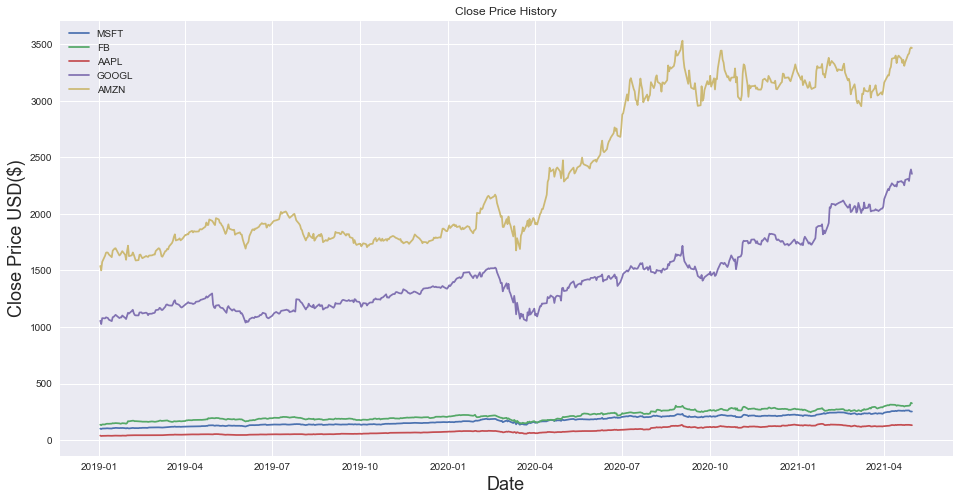

In [7]:
#plot close prices
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(msftdf['Close'], label='MSFT')
plt.plot(fbdf['Close'], label='FB')
plt.plot(aapldf['Close'], label='AAPL')
plt.plot(googdf['Close'], label='GOOGL')
plt.plot(amzndf['Close'], label='AMZN')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.legend()

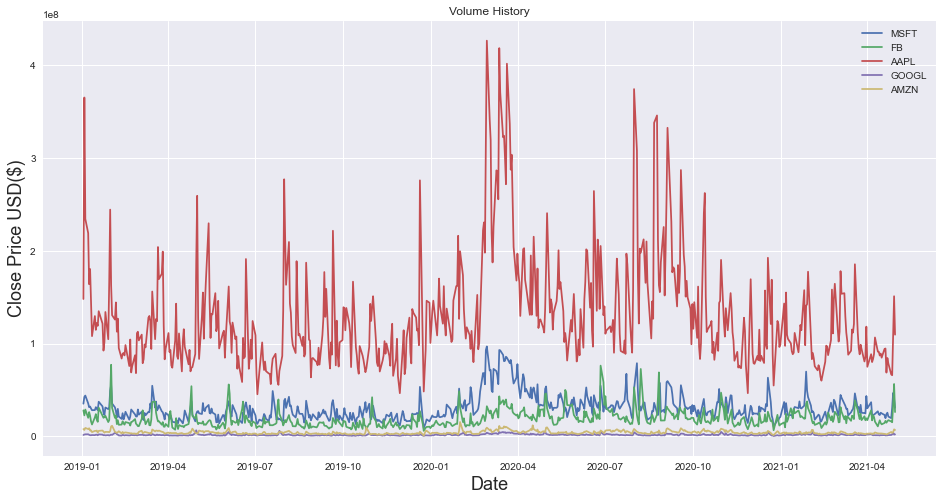

In [9]:
plt.figure(figsize=(16,8))
plt.title('Volume History')
plt.plot(msftdf['Volume'], label='MSFT')
plt.plot(fbdf['Volume'], label='FB')
plt.plot(aapldf['Volume'], label='AAPL')
plt.plot(googdf['Volume'], label='GOOGL')
plt.plot(amzndf['Volume'], label='AMZN')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.legend()

In [ ]:
#creating new column = 'Total Traded' which is close price * volume 

In [11]:
msftdf['Total Traded'] = msftdf['Close']*msftdf['Volume']
fbdf['Total Traded'] = fbdf['Close']*fbdf['Volume']
aapldf['Total Traded'] = aapldf['Close']*aapldf['Volume']
amzndf['Total Traded'] = amzndf['Close']*amzndf['Volume']
googdf['Total Traded'] = googdf['Close']*googdf['Volume']

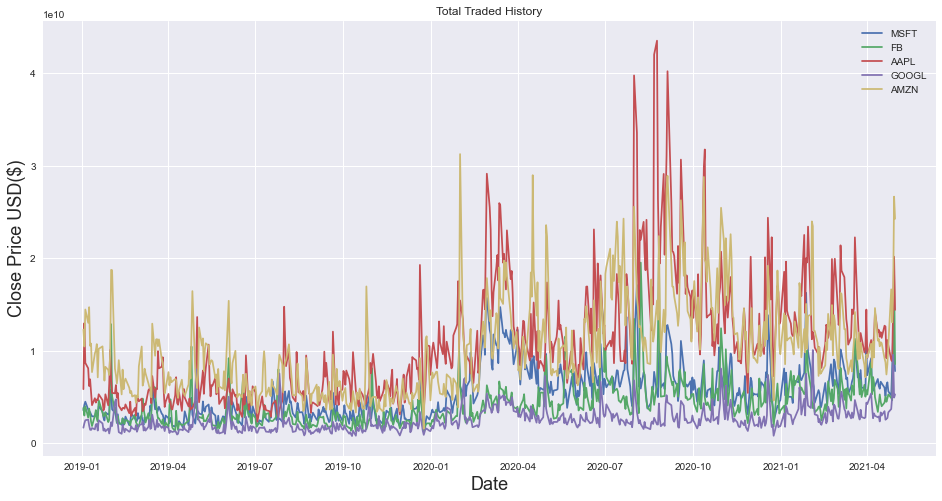

In [12]:
plt.figure(figsize=(16,8))
plt.title('Total Traded History')
plt.plot(msftdf['Total Traded'], label='MSFT')
plt.plot(fbdf['Total Traded'], label='FB')
plt.plot(aapldf['Total Traded'], label='AAPL')
plt.plot(googdf['Total Traded'], label='GOOGL')
plt.plot(amzndf['Total Traded'], label='AMZN')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.legend()

##### Before we look at 1 stock change 'ticker'df name to be df so code is reusable with minimal changes

In [13]:
# INPUT TICKER DF TO BE CHANGED TO 'df' for future code!
df = fbdf

In [14]:
df

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2019-01-02,137.509995,128.559998,128.990005,135.679993,28146200,135.679993,3.818876e+09
2019-01-03,137.169998,131.119995,134.690002,131.740005,22717900,131.740005,2.992856e+09
2019-01-04,138.000000,133.750000,134.009995,137.949997,29002100,137.949997,4.000840e+09
2019-01-07,138.869995,135.910004,137.559998,138.050003,20089300,138.050003,2.773328e+09
2019-01-08,143.139999,139.539993,139.889999,142.529999,26263800,142.529999,3.743379e+09
...,...,...,...,...,...,...,...
2021-04-26,305.799988,301.559998,303.339996,303.040009,16172600,303.040009,4.900945e+09
2021-04-27,305.339996,301.109985,304.279999,303.570007,15309300,303.570007,4.647444e+09
2021-04-28,310.920013,305.369995,307.359985,307.100006,33907200,307.100006,1.041290e+10


## Take a look at the Data!

In [15]:
from statsmodels.tsa.stattools import adfuller
#ADF test will tell us if model is stationary. If p-value is greater than .05 we can conclude it is not stationary

result = adfuller(df.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -0.8748022686814552
p-value: 0.7961571108085452


In [16]:
from statsmodels.graphics.tsaplots import plot_acf

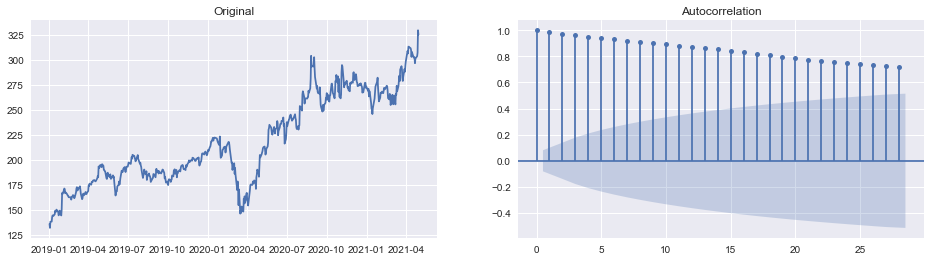

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(df.Close)
ax1.set_title('Original')
plot_acf(df.Close, ax=ax2);

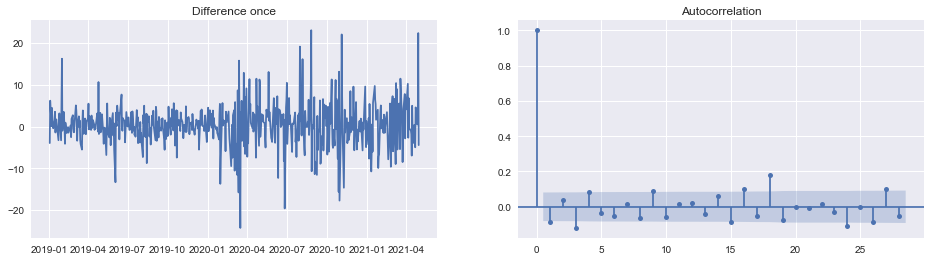

In [18]:
# check if we difference once

diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2);

##### We can conclude the data how many times the data should be differenced by the longest line in the auto correlation

In [19]:
from pmdarima.arima.utils import ndiffs

In [20]:
#another function to double check # of difference
ndiffs(df.Close, test='adf')

1

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf

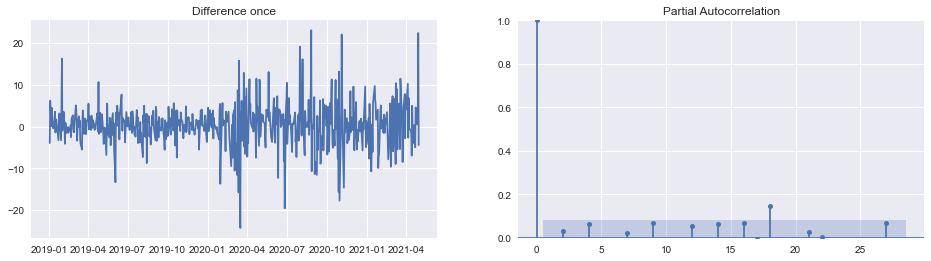

In [23]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

#we see 1 can be used as p terms

In [27]:
#Finding q. q is order of the moving average. The # of lagged forecast errors that should go into ARIMA model

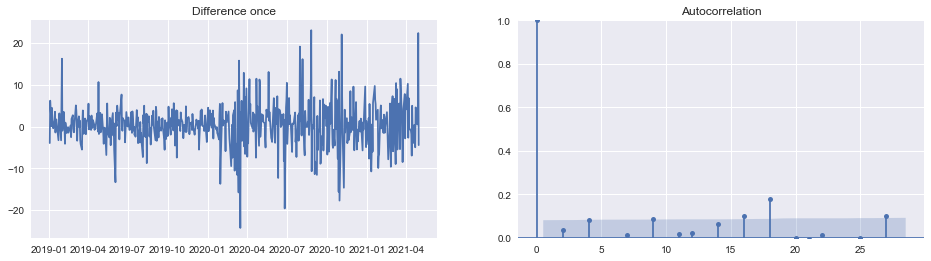

In [25]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,1)
plot_acf(diff, ax=ax2);

#we can see our q term could be 1, 4

## Getting started with ARIMA

##### First ARIMA model without splitting data

In [26]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [27]:
#check length of df
len(df)

587

In [28]:
#making arima model with pdq as 1,1,1 without fitting data

model = ARIMA(df['Close'].fillna(value=df['Close'].mean()),order=(1,1,4))
model_fit= model.fit()
model_fit.params
result= model.fit(disp=False)

C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but 

In [29]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  586
Model:                 ARIMA(1, 1, 4)   Log Likelihood               -1774.345
Method:                       css-mle   S.D. of innovations              4.997
Date:                Sun, 16 May 2021   AIC                           3562.690
Time:                        12:56:38   BIC                           3593.304
Sample:                             1   HQIC                          3574.620
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3231      0.187      1.729      0.084      -0.043       0.689
ar.L1.D.Close    -0.3890      0.203     -1.921      0.055      -0.786       0.008
ma.L1.D.Close     0.3226      0.203      1.593      0.111      -0.074       0.720
ma.L2.D.Close    -0.0001      0.045     -0.003      0.997      -0.088       0.088
ma.L3.D.Close    -0.1240      0.046     -2.688      0.007      -0.214      -0.034
ma.L4.D.Close     0.0586      0.055      1.058      0.290      -0.050       0.167
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.5704           +0.0000j            2.5704            0.5000
MA.1           -1.1040           -1.0791j            1.5438           -0.3768
MA.2           -1.1040           +1.0791j            1.5438            0.3768
MA.3            2.1615           -1.5770j            2.6756           -0.1003
MA.4            2.1615           +1.5770j            2.6756            0.1003
-----------------------------------------------------------------------------
"""

In [30]:
#use ARIMA predict function to apply predictions to variable = y_predict
y_predict = model_fit.predict(typ='levels')
print(y_predict)


Date
2019-01-03    136.003072
2019-01-04    132.441284
2019-01-07    137.615482
2019-01-08    139.109922
2019-01-09    141.432874
                 ...    
2021-04-26    301.585983
2021-04-27    303.778411
2021-04-28    302.857162
2021-04-29    307.627439
2021-04-30    328.410277
Length: 586, dtype: float64


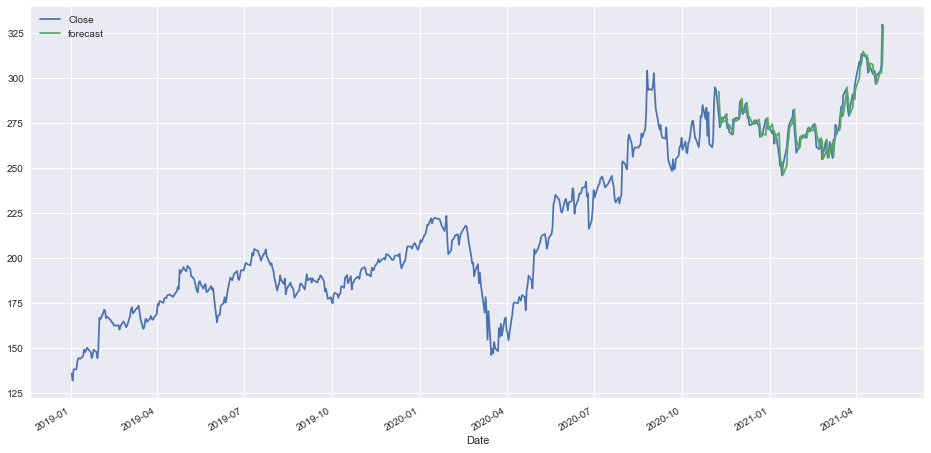

In [31]:
df['forecast']= model_fit.predict(start=468,typ='levels')
df[['Close', 'forecast']].plot(figsize=(16,8))
plt.show()

In [32]:
#check MSE score
nosplit_mse = mean_squared_error(df['Close'][1:len(df)],y_predict)

mean_squared_error(df['Close'][1:len(df)],y_predict)


24.974119623358927

##### We see this is too accurate of a prediction which is due to not splitting the data into train and test

## ARIMA with split of y_train and y_test 

In [33]:
df.drop(columns='forecast')

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2019-01-02,137.509995,128.559998,128.990005,135.679993,28146200,135.679993,3.818876e+09
2019-01-03,137.169998,131.119995,134.690002,131.740005,22717900,131.740005,2.992856e+09
2019-01-04,138.000000,133.750000,134.009995,137.949997,29002100,137.949997,4.000840e+09
2019-01-07,138.869995,135.910004,137.559998,138.050003,20089300,138.050003,2.773328e+09
2019-01-08,143.139999,139.539993,139.889999,142.529999,26263800,142.529999,3.743379e+09
...,...,...,...,...,...,...,...
2021-04-26,305.799988,301.559998,303.339996,303.040009,16172600,303.040009,4.900945e+09
2021-04-27,305.339996,301.109985,304.279999,303.570007,15309300,303.570007,4.647444e+09
2021-04-28,310.920013,305.369995,307.359985,307.100006,33907200,307.100006,1.041290e+10


In [34]:
#get close data alone

df = df[['Close']].copy()
df.info

<bound method DataFrame.info of                  Close
Date                  
2019-01-02  135.679993
2019-01-03  131.740005
2019-01-04  137.949997
2019-01-07  138.050003
2019-01-08  142.529999
...                ...
2021-04-26  303.040009
2021-04-27  303.570007
2021-04-28  307.100006
2021-04-29  329.510010
2021-04-30  325.079987

[587 rows x 1 columns]>

In [35]:
#split data into test and split at .80 (of )
y_train = df.iloc[:round(df.shape[0]*.80)]
y_test = df.iloc[round(df.shape[0]*.80):]

In [36]:
y_train.tail(10)

,Close
Date,
2020-10-28,267.670013
2020-10-29,280.829987
2020-10-30,263.109985
2020-11-02,261.359985
2020-11-03,265.299988
2020-11-04,287.380005
2020-11-05,294.679993
2020-11-06,293.410004
2020-11-09,278.769989


In [37]:
y_test.head(10)

,Close
Date,
2020-11-11,276.480011
2020-11-12,275.079987
2020-11-13,276.950012
2020-11-16,278.959991
2020-11-17,275.000000
2020-11-18,271.970001
2020-11-19,272.940002
2020-11-20,269.700012
2020-11-23,268.429993


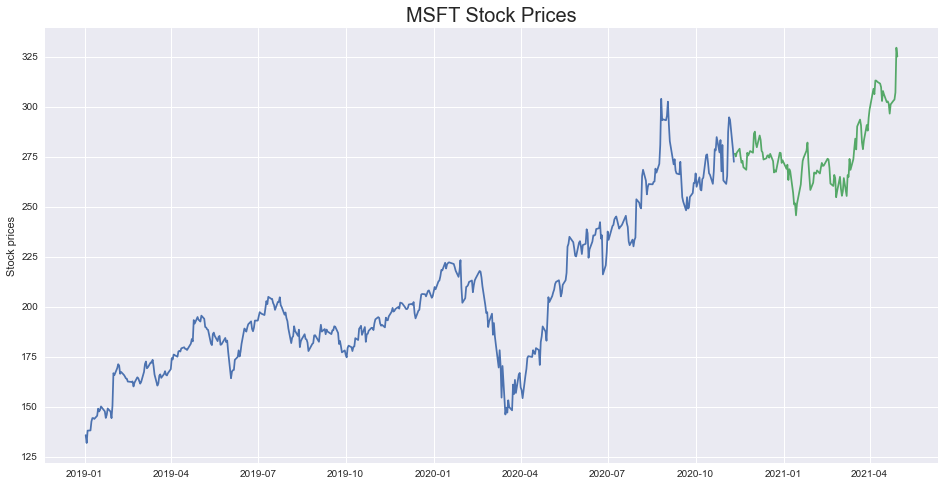

In [38]:
#plot train and test
plt.figure(figsize=(16,8))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Actual')
plt.ylabel("Stock prices")
plt.title('MSFT Stock Prices',fontsize=20)
plt.show()

In [39]:
print("start:",y_test.index.min())
print("end:",y_test.index.max())

start: 2020-11-11 00:00:00
end: 2021-04-30 00:00:00


In [40]:
y_test.shape

(117, 1)

In [41]:
y_train.shape

(470, 1)

In [45]:
arima = ARIMA(y_train,order=(1,1,1)).fit(disp=False)
y_arima = arima.predict(470,586,typ='levels')
y_arima.index = y_test.index

C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but 

In [46]:
#Check MSE of model
arima_mse = mse(y_arima,y_test)

mse(y_arima,y_test)


330.82922670323205

In [47]:
arima_df = pd.DataFrame(y_arima)

arima_df

,0
Date,
2020-11-11,272.465347
2020-11-12,272.928590
2020-11-13,273.107305
2020-11-16,273.475219
2020-11-17,273.717324
...,...
2021-04-26,305.311310
2021-04-27,305.603661
2021-04-28,305.896012


In [48]:
arima_df['Actual'] = y_test['Close'].values

arima_df

,0,Actual
Date,,
2020-11-11,272.465347,276.480011
2020-11-12,272.928590,275.079987
2020-11-13,273.107305,276.950012
2020-11-16,273.475219,278.959991
2020-11-17,273.717324,275.000000
...,...,...
2021-04-26,305.311310,303.040009
2021-04-27,305.603661,303.570007
2021-04-28,305.896012,307.100006


In [49]:
arima_df.columns=['Forecasted', 'Actual']

arima_df

,Forecasted,Actual
Date,,
2020-11-11,272.465347,276.480011
2020-11-12,272.928590,275.079987
2020-11-13,273.107305,276.950012
2020-11-16,273.475219,278.959991
2020-11-17,273.717324,275.000000
...,...,...
2021-04-26,305.311310,303.040009
2021-04-27,305.603661,303.570007
2021-04-28,305.896012,307.100006


In [50]:
arima_df['MPE'] = np.mean((arima_df['Forecasted'] - arima_df['Actual'] )/arima_df['Actual']) 

arima_df

,Forecasted,Actual,MPE
Date,,,
2020-11-11,272.465347,276.480011,0.043468
2020-11-12,272.928590,275.079987,0.043468
2020-11-13,273.107305,276.950012,0.043468
2020-11-16,273.475219,278.959991,0.043468
2020-11-17,273.717324,275.000000,0.043468
...,...,...,...
2021-04-26,305.311310,303.040009,0.043468
2021-04-27,305.603661,303.570007,0.043468
2021-04-28,305.896012,307.100006,0.043468


In [51]:
#calculate MPE score

arima_mpe = np.mean(arima_df['MPE'])

arima_mpe


0.04346760358161959

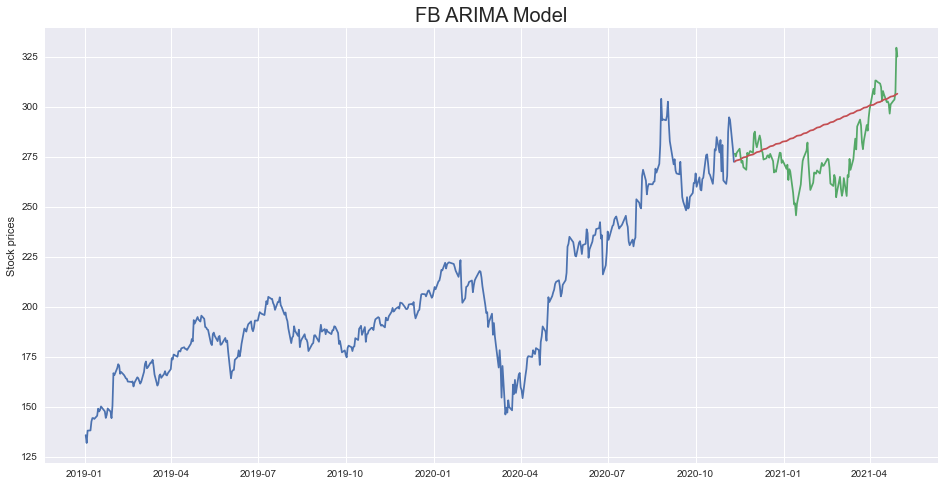

In [52]:
#Plot ARIMA model

plt.figure(figsize=(16,8))
plt.plot(y_train,label='Train')
plt.plot(y_test,label='Actual')
plt.plot(y_arima,label='ARIMA Predict')
plt.ylabel("Stock prices")
plt.title('FB ARIMA Model',fontsize=20)
#save fig
plt.savefig("ARIMA_FB.png",)

plt.show()

## Checking ARMA Model

In [53]:
from statsmodels.tsa.arima_model import ARMA

In [54]:
arma = ARMA(y_train,order=(1,1)).fit()
y_arma =arma.predict(470,586)
y_arma.index = y_test.index

C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but 

In [55]:
#Check MSE of model
arma_mse = mse(y_arma,y_test)

mse(y_arma,y_test)

873.7710454946164

In [56]:
arma_df = pd.DataFrame(y_arma)

arma_df

,0
Date,
2020-11-11,272.759153
2020-11-12,272.464069
2020-11-13,272.170245
2020-11-16,271.877677
2020-11-17,271.586358
...,...
2021-04-26,246.448455
2021-04-27,246.265762
2021-04-28,246.083850


In [57]:
arma_df['Actual'] = y_test['Close'].values

arma_df

,0,Actual
Date,,
2020-11-11,272.759153,276.480011
2020-11-12,272.464069,275.079987
2020-11-13,272.170245,276.950012
2020-11-16,271.877677,278.959991
2020-11-17,271.586358,275.000000
...,...,...
2021-04-26,246.448455,303.040009
2021-04-27,246.265762,303.570007
2021-04-28,246.083850,307.100006


In [58]:
arma_df.columns=['Forecasted', 'Actual']

arma_df

,Forecasted,Actual
Date,,
2020-11-11,272.759153,276.480011
2020-11-12,272.464069,275.079987
2020-11-13,272.170245,276.950012
2020-11-16,271.877677,278.959991
2020-11-17,271.586358,275.000000
...,...,...
2021-04-26,246.448455,303.040009
2021-04-27,246.265762,303.570007
2021-04-28,246.083850,307.100006


In [59]:
arma_df['MPE'] = np.mean((arma_df['Forecasted'] - arma_df['Actual'] )/arma_df['Actual']) 

arma_df

,Forecasted,Actual,MPE
Date,,,
2020-11-11,272.759153,276.480011,-0.067958
2020-11-12,272.464069,275.079987,-0.067958
2020-11-13,272.170245,276.950012,-0.067958
2020-11-16,271.877677,278.959991,-0.067958
2020-11-17,271.586358,275.000000,-0.067958
...,...,...,...
2021-04-26,246.448455,303.040009,-0.067958
2021-04-27,246.265762,303.570007,-0.067958
2021-04-28,246.083850,307.100006,-0.067958


In [60]:
#calculate MPE score

arma_mpe = np.mean(arma_df['MPE'])

arma_mpe

-0.06795758488801341

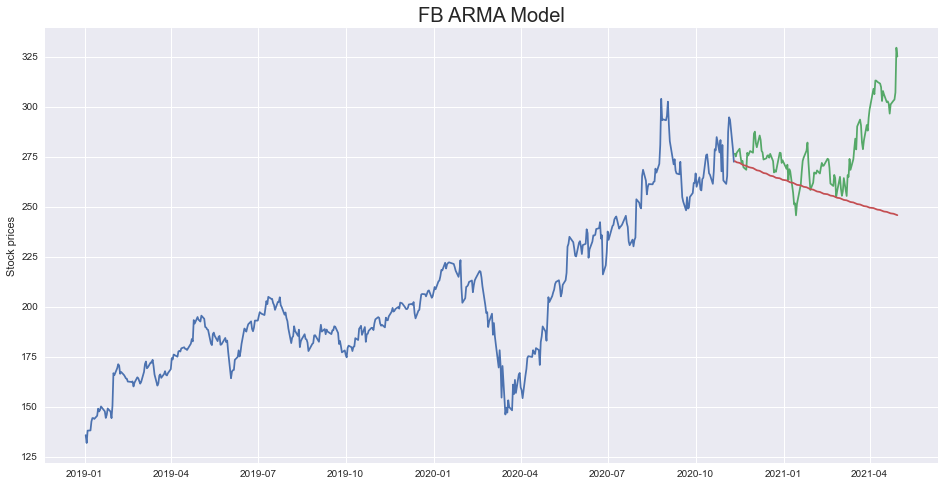

In [61]:
plt.figure(figsize=(16,8))
plt.plot(y_train,label='Train')
plt.plot(y_test,label='Actual')
plt.plot(y_arma,label='ARIMA Predict')
plt.ylabel("Stock prices")
plt.title('FB ARMA Model',fontsize=20)
#save fig
plt.savefig("ARMA_FB.png",)

plt.show()

### Visualize results

In [62]:
mse_df = pd.DataFrame({'Ticker':['FB', 'FB'],
                       'Model':['ARIMA', 'ARMA'],
                    'MSE Score':[arima_mse, arma_mse,],   
                    'MPE Score':[arima_mpe, arma_mpe]})
                   
mse_df

,Ticker,Model,MSE Score,MPE Score
0,FB,ARIMA,330.829227,0.043468
1,FB,ARMA,873.771045,-0.067958


In [63]:
#export MSE table

mse_df.to_csv('FB_MSE.csv')